# 用 Matplotlib 绘图
用 Matplotlib 创建柱状图，显示用 groupby 和查询功能做出的结论。

In [2]:
# 导入所需数据包并加载 `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df =pd.read_csv("winequality_edited.csv")

### #1: 酒精含量高的酒是否评分较高？
创建柱状图，用一个条柱表示酒精含量低的酒样本，另一个条柱表示酒精含量高的酒样本。第一个条柱已填充了数据。

In [3]:
# 用查询功能选择每个组，并获取其平均质量
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

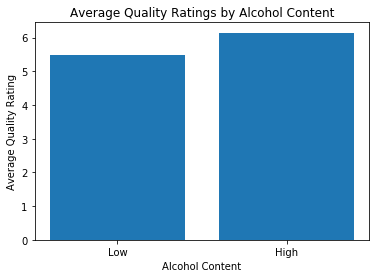

In [4]:
# 用合适的标签创建柱状图
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: 口感较甜的酒是否评分较高？
创建柱状图，用一个条柱表示残留糖分低的酒样本，另一个条柱表示残留糖分高的酒样本。

In [8]:
# 用查询功能选择每个组，并获取其平均质量
median_residual_sugar = df.residual_sugar.median()
low_residual_sugar = df[df.residual_sugar<median_residual_sugar]
high_residual_sugar = df.query(f"residual_sugar >= {median_residual_sugar}")# 因为df.query查询表达式时字符串，因此可以使用字符串格式功能。
mean_quality_low = low_residual_sugar.quality.mean()
mean_quality_high = high_residual_sugar["quality"].mean()

Text(0,0.5,'Average Quality Ratings')

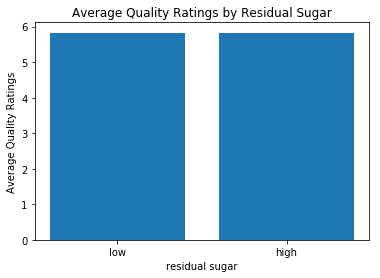

In [9]:
# 用合适的标签创建柱状图
locations =[1,2]
heights =[mean_quality_low,mean_quality_high]
labels = ["low","high"]
plt.bar(locations,heights,tick_label=labels)
plt.title("Average Quality Ratings by Residual Sugar")
plt.xlabel("residual sugar")
plt.ylabel("Average Quality Ratings")

### #3: 哪个酸度水平的平均评分最高？
创建柱状图，四个酸度水平分别用一个条柱表示。

In [20]:
# 使用分组功能获取每个酸度水平的平均质量
low_acidity_level = df[df.acidity_levels=="low"]
median_acidity_level = df.query("acidity_levels == 'median'")
moderate_high_acidity_level = df.query("acidity_levels == 'moderate_high'")
high_acidity_level = df[df.acidity_levels == "high"]
mean_quality_low_acidity = low_acidity_level.quality.mean()
mean_quality_median_acidity = median_acidity_level.quality.mean()
mean_quality_moderate_high_acidity = moderate_high_acidity_level.quality.mean()
mean_quality_high_acidity = high_acidity_level.quality.mean()

Text(0,0.5,'Average Quality Ratings')

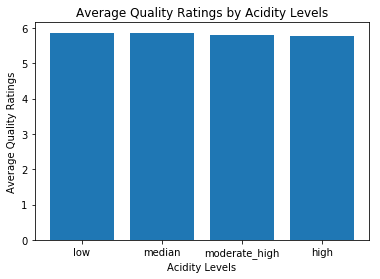

In [22]:
# 用合适的标签创建柱状图
locations = [1,2,3,4]
heights = [mean_quality_low_acidity,mean_quality_median_acidity,mean_quality_moderate_high_acidity,mean_quality_high_acidity]
labels = ["low","median","moderate_high","high"]
plt.bar(locations,heights,tick_label=labels)
plt.title("Average Quality Ratings by Acidity Levels")
plt.xlabel("Acidity Levels")
plt.ylabel("Average Quality Ratings")

### 附加题：为 #3 中的数据创建线图
可以使用 pyplot 的 [绘图](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) 功能进行创建。

将线图与柱状图相比较。如果用线图代替柱状图，会对数据结论产生什么影响？